## Task 1: Edge Detection Comparison

Objective: The objective of this task is to understand and compare different edge detection operators by applying them to the same image and analyzing their effectiveness in detecting edges at various orientations and strengths.

### 1. Load a grayscale image of your choice (preferably one with clear edges and structures).

In [338]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image as grayscale
image = cv2.imread('grayscale.jpg', cv2.IMREAD_GRAYSCALE)

print("Image succesfully loaded !") 

Image succesfully loaded !


### 2. Implement edge detection using three different operators:
###     o Sobel operator (horizontal and vertical)
###     o Prewitt operator (horizontal and vertical)
###     o Scharr operator (horizontal and vertical)

In [339]:
# Define Sobel kernels for edge detection
# Horizontal edge detection
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

# Vertical edge detection
sobel_y = np.array([[-1, -2, -1],
                     [0,  0,  0],
                    [1,  2,  1]], dtype=np.float32)

# Prewitt operator for edge detection
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                     [-1, 0, 1]], dtype=np.float32)

prewitt_y = np.array([[-1, -1, -1],
                       [0,  0,  0],
                      [1,  1,  1]], dtype=np.float32)

# Scharr operator (more accurate than Sobel)
scharr_x = np.array([[-3, 0, 3],
                   [-10, 0, 10],
                    [-3, 0, 3]], dtype=np.float32)

scharr_y = np.array([[-3, -10, -3],
                       [0,  0,  0],
                     [3,  10,  3]], dtype=np.float32)

print("Implemented !")

Implemented !


### 3. For each operator, compute the magnitude of edges by combining horizontal and vertical components using: magnitude = sqrt(horizontal² + vertical²)

In [340]:
# Apply all filters
sobel_edges_x = cv2.filter2D(image, -1, sobel_x)
sobel_edges_y = cv2.filter2D(image, -1, sobel_y)

prewitt_edges_x = cv2.filter2D(image, -1, prewitt_x)
prewitt_edges_y = cv2.filter2D(image, -1, prewitt_y)

scharr_edges_x = cv2.filter2D(image, -1, scharr_x)
scharr_edges_y = cv2.filter2D(image, -1, scharr_y)

# Compute magnitudes
sobel_magnitude = np.sqrt(sobel_edges_x**2 + sobel_edges_y**2)

prewitt_magnitude = np.sqrt(prewitt_edges_x**2 + prewitt_edges_y**2)

scharr_magnitude = np.sqrt(scharr_edges_x**2 + scharr_edges_y**2)

# Conversion in uint8 (Even though in the examples it is not done for prewitt and scharr, i will still do it here to be sure to not have problems with the image)

sobel_magnitude = np.uint8(sobel_magnitude)

prewitt_magnitude = np.uint8(prewitt_magnitude)

scharr_magnitude = np.uint8(scharr_magnitude)

print("Done for each operator !")

Done for each operator !


### 4. Display all results in a grid layout showing:
### o Original image
### o Sobel edge detection result
### o Prewitt edge detection result
### o Scharr edge detection result

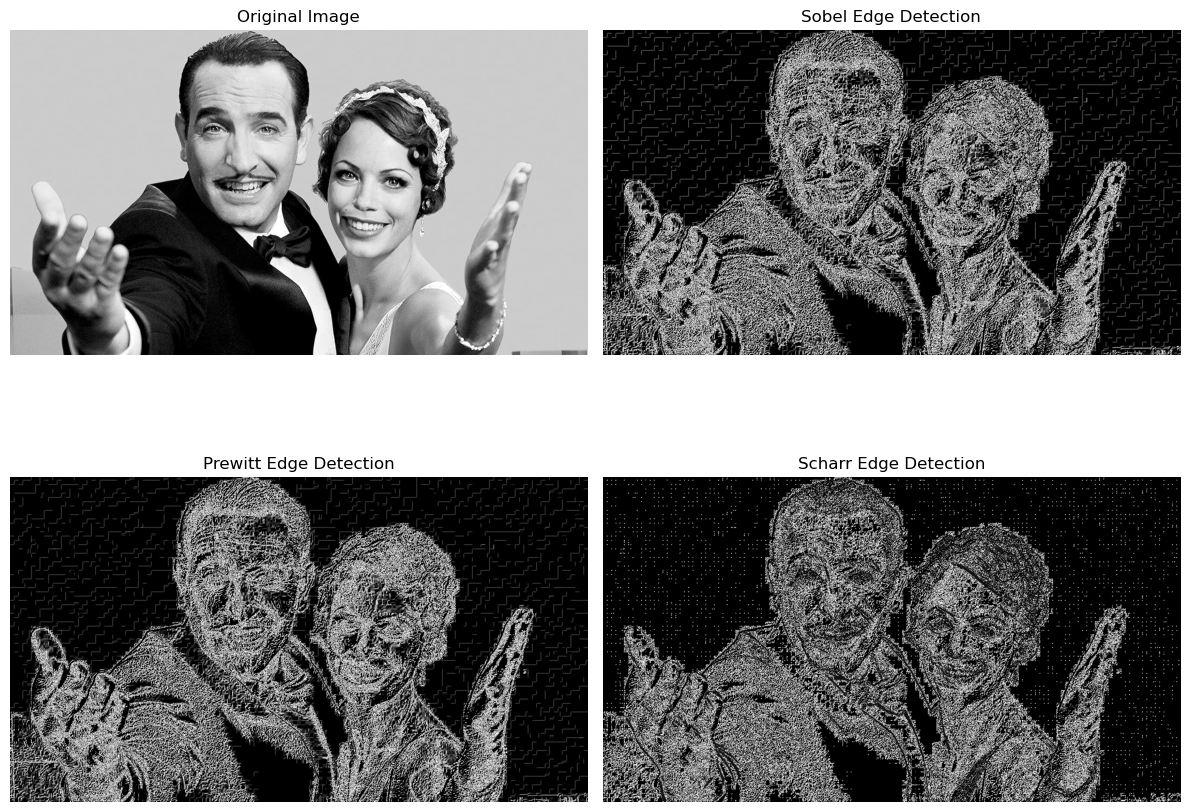

In [341]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_magnitude, cmap='gray')
axes[0, 1].set_title('Sobel Edge Detection')
axes[0, 1].axis('off')

axes[1, 0].imshow(prewitt_magnitude, cmap='gray')
axes[1, 0].set_title('Prewitt Edge Detection')
axes[1, 0].axis('off')

axes[1, 1].imshow(scharr_magnitude, cmap='gray')
axes[1, 1].set_title('Scharr Edge Detection')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 5. Compare the three operators and observe which one detects edges more accurately and produces stronger responses.

##### Sobel Edge Detection: 

The edges are well detected, with thick lines on the main contours, like for the arms and the faces. There is some internal noise (granular textures inside the figures). It provides a good balance between detection and noise, but it is not as fine as Scharr.

##### Prewitt Edge Detection: 

Similar to Sobel, but with a bit less precision on curves, like the hair for example is less detailled than with Sobel. Also the contours are a bit smoother.

##### Scharr Edge Detection:

The best of the three. The edges are more precise and detailed, with finer lines and better capture of subtle textures, here the edges for the hair is perfect comparing to Prewitt for example; there are also more details on the face than with Sobel. 

### Conclusion

It is Scharr operator which produces the strongest responses and detect edges more accurately

## Task 2: Custom Kernel Design and Application

### 1. Load a grayscale or color image of your choice.

In [342]:
# Load an image as grayscale
image = cv2.imread('puppy.jpg', cv2.IMREAD_GRAYSCALE)

print("Image succesfully loaded !") 

Image succesfully loaded !


### 2. Create at least four custom kernels with different effects:
### o A sharpening kernel (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
### o An edge enhancement kernel
### o An emboss kernel (e.g., [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
### o A custom blur kernel of your own design

In [343]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening
edge_enhance_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])  # Edge enhancement
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])  # Emboss
gaussian_blur_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/ np.sum(np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])) #Gaussian blur kernel
box_blur_kernel = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])/ np.sum(np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])) #Box blur kernel
custom_blur_kernel = np.ones((10, 10)) / 100  # Custom blur 

kernels = [sharpen_kernel, edge_enhance_kernel, emboss_kernel, gaussian_blur_kernel, box_blur_kernel, custom_blur_kernel]
titles = ['Sharpen', 'Edge Enhance', 'Emboss', 'Gaussian blur', 'Box blur' ,'Custom Blur']

print("Done !")

Done !


### 3. Apply each kernel to your image using cv2.filter2D().

In [344]:
filtered_images = [cv2.filter2D(image, -1, kernel) for kernel in kernels]

print("Done !")

Done !


### 4. Display the original image alongside all filtered versions in a grid layout with appropriate titles.

<Figure size 1280x960 with 0 Axes>

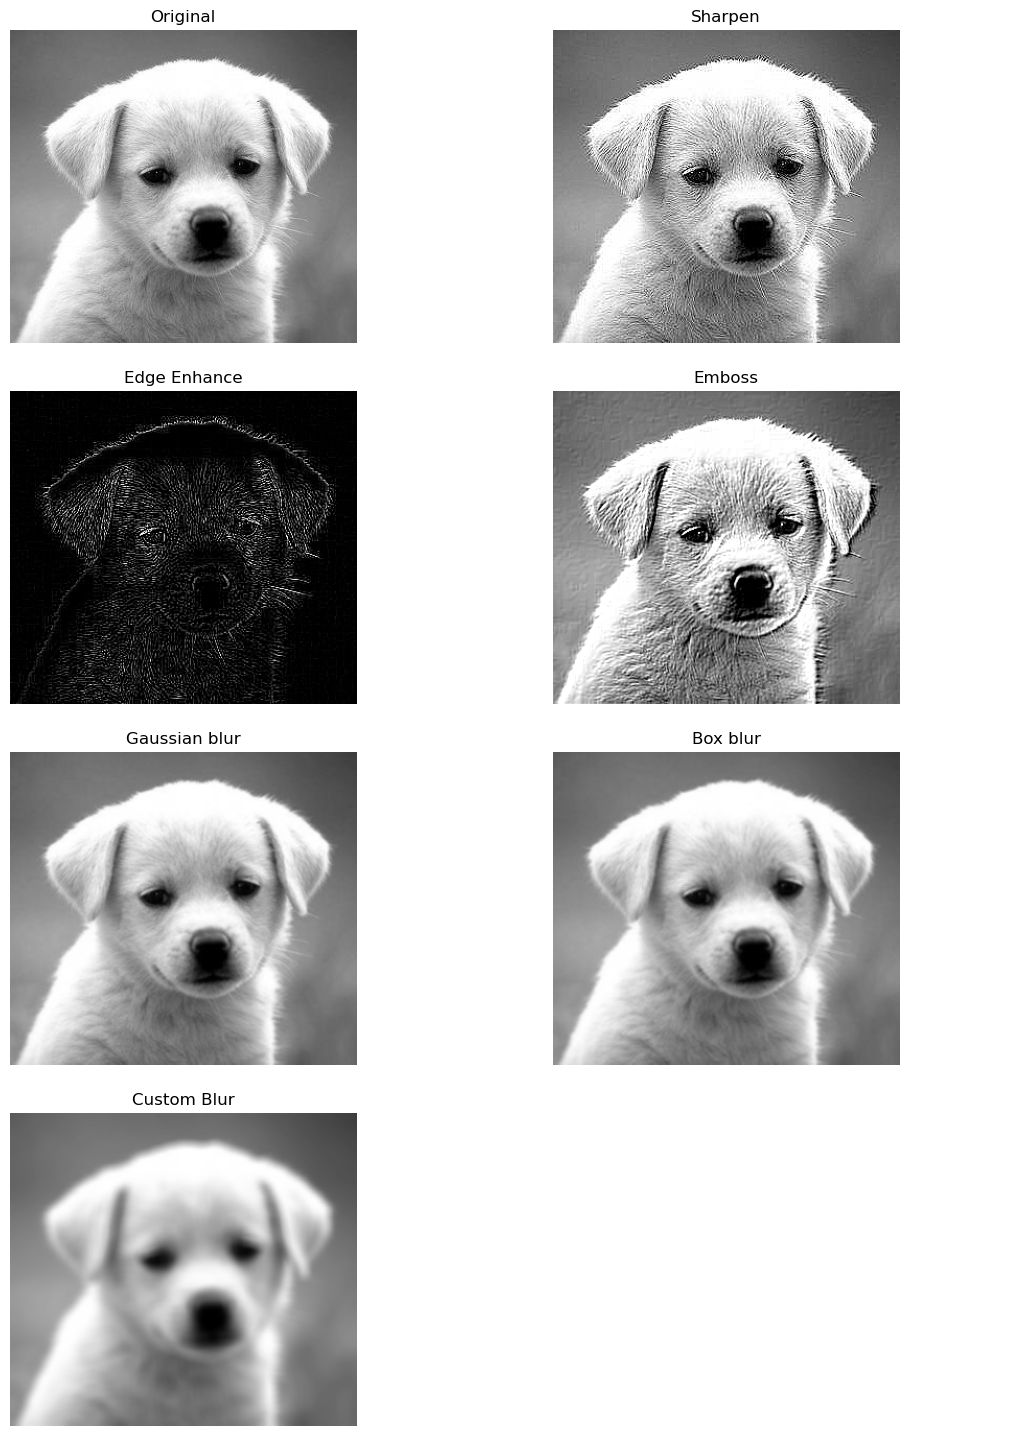

In [345]:
plt.figure(dpi=200) 
fig, axes = plt.subplots(4, 2, figsize=(12, 15))  


axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')
axes[3, 1].axis('off')


positions = [(0, 1), (1, 0), (1, 1), (2, 0), (2, 1),(3, 0)]  # Predefined positions 
for i, (filtered, title, pos) in enumerate(zip(filtered_images, titles, positions)):
    row, col = pos
    axes[row, col].imshow(filtered, cmap='gray')
    axes[row, col].set_title(title)
    axes[row, col].axis('off')


plt.tight_layout(pad=3.0, h_pad=2.0)
plt.show()

### 5. Experiment by modifying kernel values and observe how changes affect the output. Document your observations.

<Figure size 1280x960 with 0 Axes>

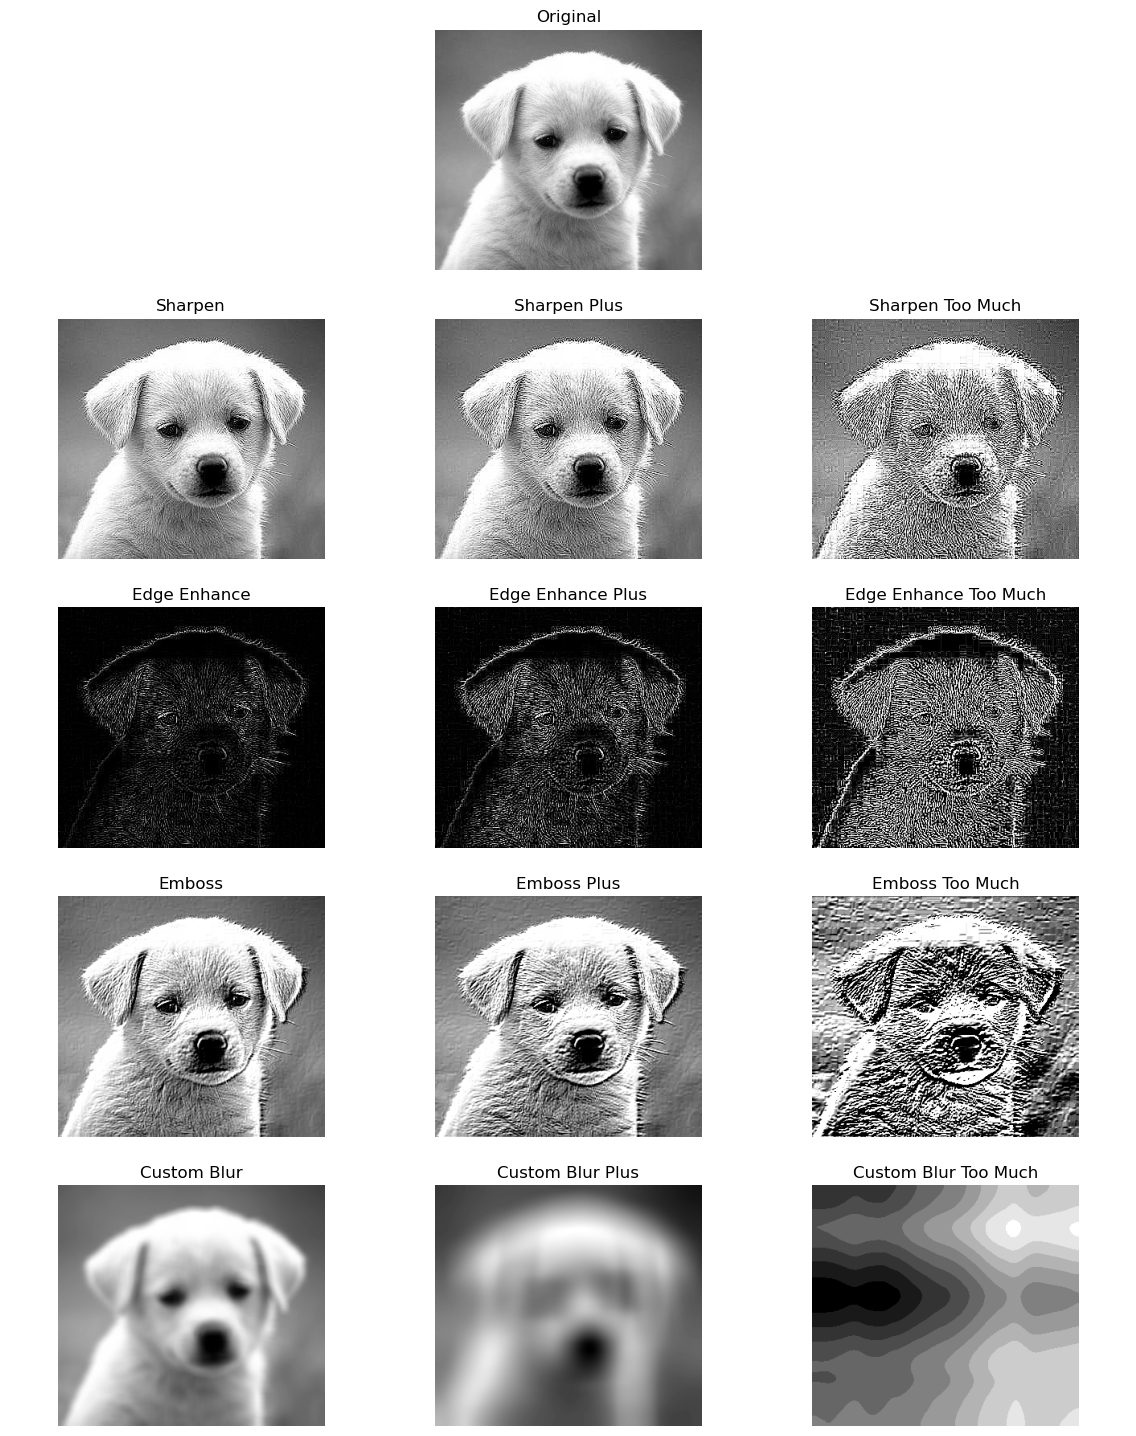

In [346]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  

sharpen_kernel_plus = np.array([[0, -2, 0], [-2, 9, -2], [0, -2, 0]])  

sharpen_kernel_too_much = np.array([[0, -10, 0], [-10, 41, -10], [0, -10, 0]])  

edge_enhance_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])  

edge_enhance_kernel_plus = np.array([[-2, -2, -2], [-2, 16, -2], [-2, -2, -2]])  

edge_enhance_kernel_too_much = np.array([[-10, -10, -10], [-10, 80, -10], [-10, -10, -10]])  

emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])  

emboss_kernel_plus = np.array([[-3, -2, -1], [-1, 1, 1], [1, 2, 3]])  

emboss_kernel_too_much = np.array([[-20, -19, -17], [-10, 1, 10], [17, 19, 20]])  

custom_blur_kernel = np.ones((10, 10)) / 100  # Custom blur 

custom_blur_kernel_plus = np.ones((50, 50)) / 2500  # Custom blur 

custom_blur_kernel_too_much = np.ones((1000, 1000)) / 1000000  # Custom blur 

kernels2 = [sharpen_kernel, sharpen_kernel_plus, sharpen_kernel_too_much , edge_enhance_kernel, edge_enhance_kernel_plus, edge_enhance_kernel_too_much, emboss_kernel,emboss_kernel_plus ,emboss_kernel_too_much, custom_blur_kernel, custom_blur_kernel_plus ,custom_blur_kernel_too_much]
titles2 = ['Sharpen','Sharpen Plus', 'Sharpen Too Much', 'Edge Enhance', 'Edge Enhance Plus', 'Edge Enhance Too Much', 'Emboss','Emboss Plus', 'Emboss Too Much','Custom Blur', 'Custom Blur Plus', 'Custom Blur Too Much']

filtered_images2 = [cv2.filter2D(image, -1, kernel) for kernel in kernels2]


plt.figure(dpi=200) 
fig, axes = plt.subplots(5, 3, figsize=(12, 15))  


axes[0, 1].imshow(image, cmap='gray')
axes[0, 1].set_title('Original')
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')


positions2 = [(1, 0), (1, 1), (1, 2), (2, 0),(2, 1),(2,2), (3, 0),(3, 1),(3,2), (4, 0),(4, 1),(4,2)]  # Predefined positions 
for i, (filtered, title, pos) in enumerate(zip(filtered_images2, titles2, positions2)):
    row, col = pos
    axes[row, col].imshow(filtered, cmap='gray')
    axes[row, col].set_title(title)
    axes[row, col].axis('off')


plt.tight_layout(pad=3.0, h_pad=2.0)
plt.show()

#### Observations

In this section, I modified the values of the kernels to observe their impact on the processed image.
The modifications focused primarily on increasing the central value and the negative weights of the neighbors, amplifying gradients and details. I applied three levels per kernel: Base (normal values), "Plus" (moderate increase), and "Too Much" (extreme increase). The results are displayed in the attached figure (generated with Matplotlib using a 4x3 grid).

##### Modifications and Observations for the Sharpen Kernel:

Base Kernel: [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]

Observation: The image is slightly sharper, with improved contours (the puppy’s eyes and snout become more defined). The negative neighbor weights subtract surrounding intensities, enhancing details with minimal noise.


Plus Kernel: [[0, -2, 0], [-2, 9, -2], [0, -2, 0]] (increase of the center from 5 to 9 and neighbors from -1 to -2)

Observation: More pronounced enhancement of textures (visible fur, increased contrasts). The higher center value amplifies the current pixel’s weight in the weighted sum, making the image more vivid without significant artifacts.


Too Much Kernel: [[0, -10, 0], [-10, 41, -10], [0, -10, 0]] (extreme increase of the center to 41 and neighbors to -10)

Observation: Extreme over-sharpening, with granular noise and halos around edges. The image becomes over-contrasted and loses natural detail.

##### Modifications and Observations for the Edge Enhance Kernel:

Base Kernel: [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

Observation: Edges are highlighted (puppy’s outline in black against a darker background), with uniform detection of intensity changes.


Plus Kernel: [[-2, -2, -2], [-2, 16, -2], [-2, -2, -2]] (increase of the center from 8 to 16 and neighbors from -1 to -2)

Observation: Stronger edges and better-defined internal textures (fur as lines). No major loss.


Too Much Kernel: [[-10, -10, -10], [-10, 80, -10], [-10, -10, -10]] (extreme increase of the center to 80 and neighbors to -10)

Observation: Thick black outlines and saturation (dominant white areas). This shows the limits of the approach: extreme weights amplify noise and obscure subtle details.


##### Modifications and Observations for the Emboss Kernel:

Base Kernel: [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]

Observation: Subtle relief effect.


Plus Kernel: [[-3, -2, -1], [-1, 1, 1], [1, 2, 3]] (asymmetric weight increase)

Observation: More pronounced relief, with stronger contrasts (fur and snout appear "engraved").


Too Much Kernel: [[-10, -9, -8], [-7, 1, 7], [8, 9, 10]] (extreme asymmetric increase)

Observation: Severe distortion, with overexposure and loss of shape (whitened image with deformed contours).

#### Modfications and Observations for the Custom Blur Kernel:

Base Kernel: 

Observation: The image is overall blurry but we can still see the puppy's shape.


Plus Kernel: 

Observation: More pronounced blur, we can guess the puppy's shape but it is more difficult, large areas became white (the snout is now just a black circle).


Too Much Kernel: 

Observation: The image is overall messy, we cannot know that a puppy is hiding behind all this blur.


#### General Conclusions:
The modifications confirm that increasing the central value (and negative neighbor weights) enhances the desired effect (sharpening, enhancement, relief), but can introduce noise, saturation, or artifacts when excessive, as seen in the "Too Much" cases. 

## Task 3 Noise Addition and Reduction Analysis

### 1. Load a clean grayscale image

In [347]:
# Load an image as grayscale
image = cv2.imread('Wild_Horse.jpg', cv2.IMREAD_GRAYSCALE)

print("Image succesfully loaded !") 

Image succesfully loaded !


### 2. Add salt-and-pepper noise to the image at three different noise levels: 1%, 5%, and 10%.

In [348]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """
    Add salt and pepper noise to an image
    """
    noisy = image.copy()
    height, width = image.shape[:2]
    
    # Add salt (white pixels)
    n_salt = int(height * width * salt_prob)
    salt_coords = [np.random.randint(0, i, n_salt) for i in (height, width)]
    noisy[salt_coords[0], salt_coords[1]] = 255
    
    # Add pepper (black pixels)
    n_pepper = int(height * width * pepper_prob)
    pepper_coords = [np.random.randint(0, i, n_pepper) for i in (height, width)]
    noisy[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy


noisy_1=add_salt_pepper_noise(image=image, salt_prob=0.01, pepper_prob=0.01)
noisy_5=add_salt_pepper_noise(image=image, salt_prob=0.05, pepper_prob=0.05)
noisy_10=add_salt_pepper_noise(image=image, salt_prob=0.1, pepper_prob=0.1)

### 3. Apply the following noise reduction filters to each noisy image:
### o Median filter (5x5)
### o Gaussian filter (5x5)
### o Bilateral filter
### o Non-Local Means denoising (optional)

In [349]:
noisy_images=[noisy_1,noisy_5,noisy_10]
result=[]

for noisy in noisy_images:
    result.append(cv2.medianBlur(noisy, 5))
    result.append(cv2.GaussianBlur(noisy, (5, 5), 0))
    result.append(cv2.bilateralFilter(noisy, 9, 75, 75))
    result.append(cv2.fastNlMeansDenoising(noisy, None, 10, 7, 21))

### 4. Calculate the Peak Signal-to-Noise Ratio (PSNR) between the original clean image and each filtered result to quantitatively measure restoration quality

In [350]:
def calculate_psnr(original, filtered):
    mse = np.mean((original.astype(float) - filtered.astype(float)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnrs=[]

for f in result:
    psnrs.append(calculate_psnr(image,f))
    
print(psnrs)

[25.658842824082207, 26.924187048332215, 24.712670717746, 22.973489973330853, 25.54821296508869, 23.85727634935705, 19.970104587385762, 15.555225990846242, 25.360906457456306, 21.634323253516015, 16.53934963096065, 12.805206848342024]


The highest PSNR stands around 26.9 wich is not perfect (not between 30 and 60) but not bad either, just good ! The lowest stands at 12.8, meaning the image will appear noisy still. 

### 5. Display a comprehensive comparison showing:
### o Original clean image
### o Noisy images at different levels
### o All filtered results with their PSNR values

<Figure size 1280x960 with 0 Axes>

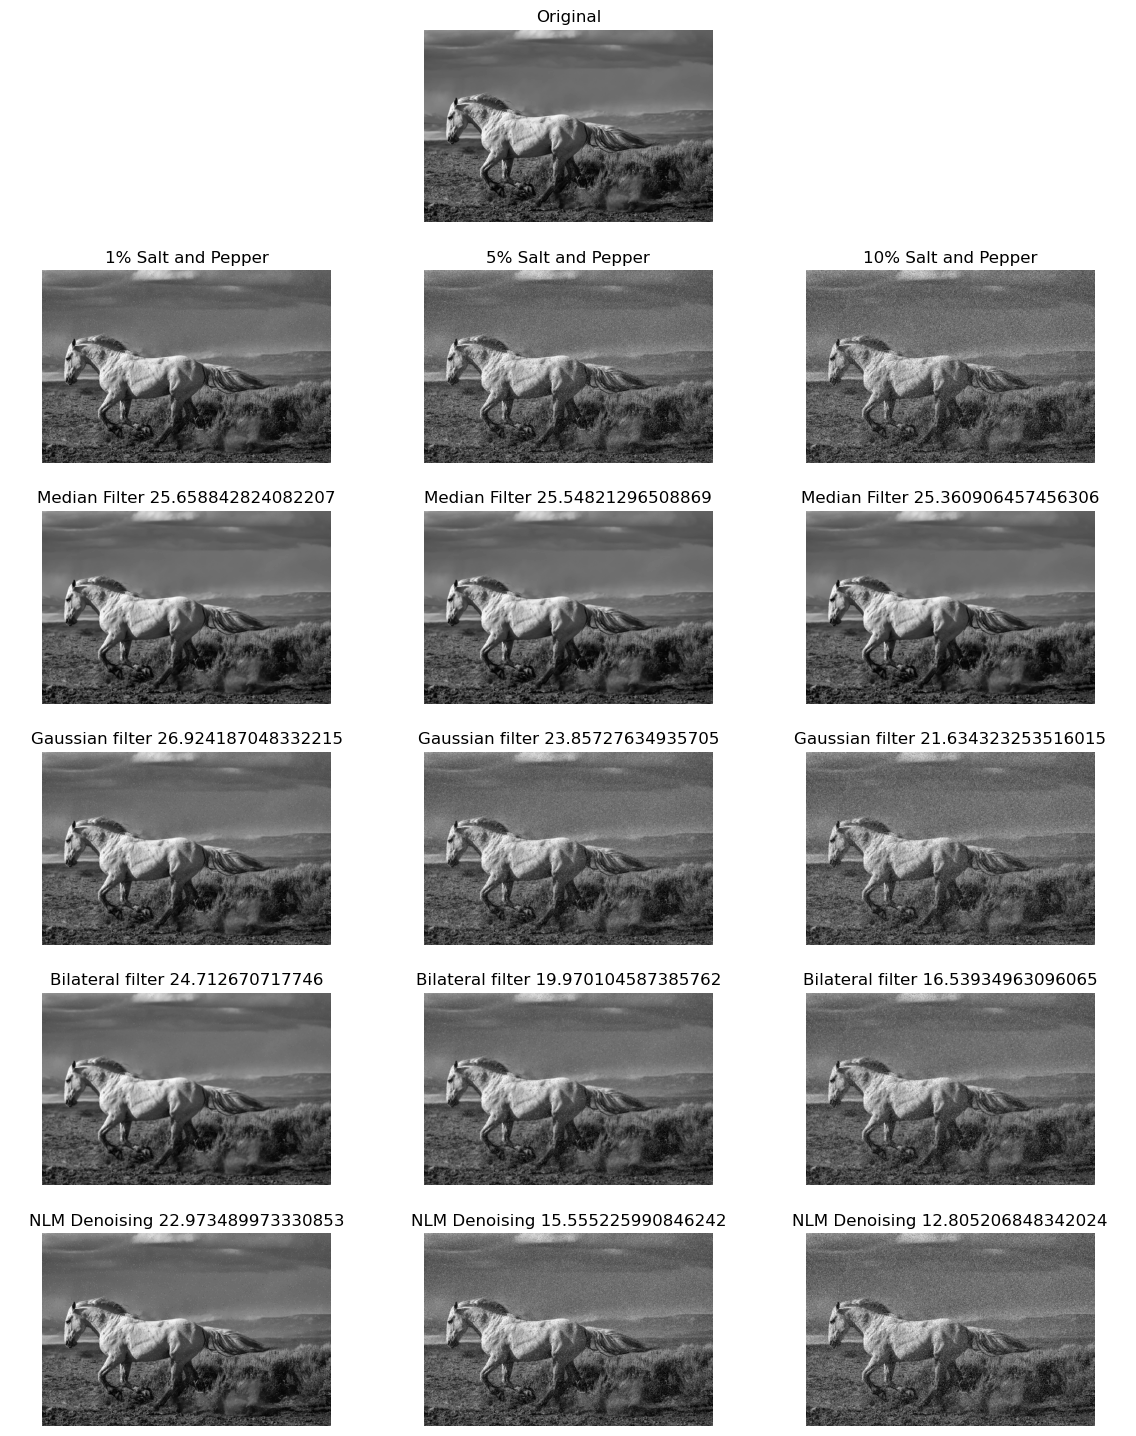

In [351]:
plt.figure(dpi=200) 
fig, axes = plt.subplots(6, 3, figsize=(12, 15))  


axes[0, 1].imshow(image, cmap='gray')
axes[0, 1].set_title('Original')
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')

axes[1, 0].imshow(noisy_1, cmap='gray')
axes[1, 0].set_title('1% Salt and Pepper')
axes[1, 0].axis('off')


axes[1, 1].imshow(noisy_5, cmap='gray')
axes[1, 1].set_title('5% Salt and Pepper')
axes[1, 1].axis('off')

axes[1, 2].imshow(noisy_10, cmap='gray')
axes[1, 2].set_title('10% Salt and Pepper')
axes[1, 2].axis('off')


title3=["Median Filter","Gaussian filter","Bilateral filter","NLM Denoising",
        "Median Filter","Gaussian filter","Bilateral filter","NLM Denoising","Median Filter",
        "Gaussian filter","Bilateral filter","NLM Denoising",]

for i in range(0, len(title3)):
    title3[i]+=' '+str(psnrs[i])

positions3 = [ (2, 0), (3, 0),(4, 0),(5,0),(2, 1),(3, 1), (4, 1),(5,1),(2,2),(3,2),(4,2),(5,2)]  # Predefined positions 
for i, (filtered, title, pos) in enumerate(zip(result, title3, positions3)):
    row, col = pos
    axes[row, col].imshow(filtered, cmap='gray')
    axes[row, col].set_title(title)
    axes[row, col].axis('off')


plt.tight_layout(pad=3.0, h_pad=2.0)
plt.show()

Overall Trends Across Noise Levels

Noise Impact: As noise increases from 1% to 10%, PSNR decreases for all filters with higher noise, meaning a poorer restoration (Median PSNR drops from 25.68 dB at 1% to 25.36 dB at 10%).
Filter Effectiveness: All filters perform best at low noise. Bilateral preserves edges across levels. NLM struggles with salt-and-pepper, as it's more suited for Gaussian noise. Visually, all filters reduce specks, but some introduce blurring or artifacts at higher noise.

Filter-Specific Performance

Median Filter:

PSNR: 25.68 dB (1%), 25.54 dB (5%), 25.36 dB (10%).
Observation: Excellent for salt-and-pepper noise, as it replaces outliers with the median of neighbors, effectively removing specks without much blurring at low noise (1%-5%). At 10%, some details (horse legs) soften slightly, but edges remain intact. It is the best for salt and pepper noise at all levels because the median filter is good for removing impulsive noise.


Gaussian Filter :

PSNR: 26.93 dB (1%), 23.88 dB (5%), 21.62 dB (10%).
Observation: Strong at low noise (1%), smoothing specks well with a weighted average, but introduces more blurring than Median ( still salt and pepper into the background at 5%-10%). PSNR drops faster with noise increase, indicating it's less robust for high impulsive noise. It's good for general smoothing but not optimal for outliers like salt-and-pepper.


Bilateral Filter :

PSNR: 24.74 dB (1%), 20.01 dB (5%), 16.50 dB (10%).
Observation: Balances noise removal with edge preservation (horse outlines stay sharp even at 10%), as it weights neighbors by both spatial and intensity similarity. However, PSNR is lower than Median/Gaussian, and at high noise, some specks persist or artifacts appear. This demonstrates adaptive neighborhood operations , making it suitable for images with important edges.


NLM Denoising (Non-Local Means):

PSNR: 22.99 dB (1%), 15.75 dB (5%), 12.80 dB (10%).
Observation: Poorest performer for salt-and-pepper, with significant blurring and residual noise at higher levels (image still blurry at  10%). NLM searches for similar patches globally, but impulsive noise disrupts this, leading to low PSNR. It's better for Gaussian noise.



Comparative Insights

Best Filter for Salt-and-Pepper Noise: Median excels overall (highest PSNR, best speck removal), especially at moderate-high noise, due to its non-linear nature handling outliers effectively. Gaussian is a close second for low noise but blurs more. Bilateral is ideal when edge preservation is priority. NLM is least effective here.
Noise Level Impact: At 1%, all filters perform well (PSNR >20 dB), but differences amplify at 10% (Median retains ~25 dB while NLM drops to 12 dB), highlighting the need for noise-specific filters.

## Task 4: Motion Blur Simulation and Analysis

### 1. Load a color image

In [352]:
# Load image
originalRGB = cv2.imread('trees.jpg')
originalBGR = cv2.cvtColor(originalRGB, cv2.COLOR_BGR2RGB)

### 2. Implement a function to create motion blur kernels at different angles (0°, 45°, 90°, 135°) with a kernel size of at least 20x20.

In [353]:
def create_motion_blur_kernel(size, angle):
    """
    Create a motion blur kernel
    
    Args:
        size: Size of the kernel
        angle: Angle of motion in degrees
    """
    kernel = np.zeros((size, size))
    center = size // 2
    
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)
    
    # Create line along the angle
    for i in range(size):
        offset = i - center
        x = int(center + offset * np.cos(angle_rad))
        y = int(center + offset * np.sin(angle_rad))
        
        if 0 <= x < size and 0 <= y < size:
            kernel[y, x] = 1
    
    # Normalize
    kernel /= np.sum(kernel)
    
    return kernel

angles = [0, 45, 90, 135]
size = 20

### 3. Apply each motion blur kernel to your image using cv2.filter2D().

In [354]:
result_mblur=[]
kernel_used=[]

for angle in angles:
    kernel = create_motion_blur_kernel(size, angle)
    blurred = cv2.filter2D(originalRGB, -1, kernel)
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
    kernel_used.append(kernel)
    result_mblur.append(blurred_rgb)


### 4. Create a visualization showing:
### o The original image
### o Motion blurred versions at each angle
### o The kernel used for each blur (visualized as a small image)

<Figure size 640x480 with 0 Axes>

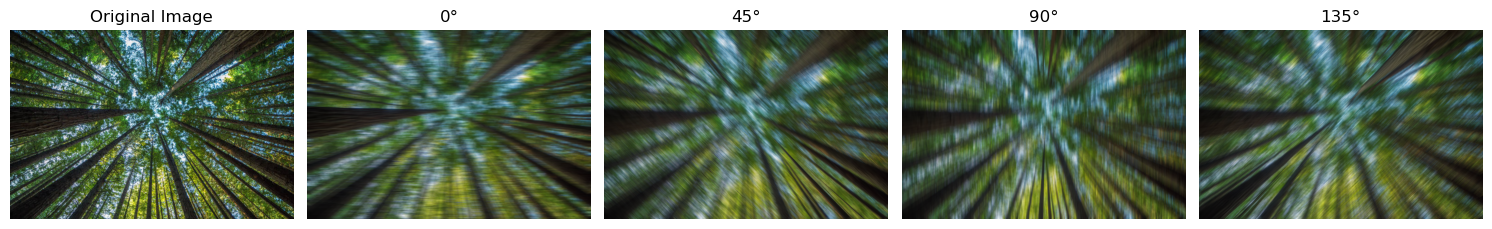

In [357]:




title4=["0°","45°","90°","135°"]
        
title5=["Kernel Used for 0°","Kernel Used for 45°","Kernel Used for 90°","Kernel Used for 135°"]


positions4 = [ (1,0),(1,1),(1,2),(1,3)]

plt.figure(dpi=100)
fig, axes = plt.subplots(1, 5, figsize=(15, 6))  # Increased figsize for larger images
axes[0].imshow(originalBGR)
axes[0].set_title('Original Image')
axes[0].axis('off')
titles = ["0°", "45°", "90°", "135°"]
for i, (filtered, title) in enumerate(zip(result_mblur, titles)):
    axes[i + 1].imshow(filtered)
    axes[i + 1].set_title(title)
    axes[i + 1].axis('off')
plt.tight_layout(pad=1.0, h_pad=0.5)
plt.show()
   
